# Logistic Regression Model Development
Trainer : - Rajesh Jakhtoia

### Load packages

In [1]:
##Import the packages
import pandas as pd
import numpy as np

### Import Data

In [2]:
LR_DF = pd.read_csv("LR_DF_V2.csv")

In [3]:
LR_DF.shape

(20000, 10)

In [4]:
## Get Frequency of 0 and 1
target_freq = pd.crosstab(index=LR_DF['Target'], 
                             columns="count",
                             )

target_freq['prop'] = target_freq/target_freq.sum()
target_freq

col_0,count,prop
Target,,
0,18267,0.91335
1,1733,0.08665


In [5]:
LR_DF.head(10)

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31
5,C17960,0,45,M,403324.49,SENP,11,41-45,364,2
6,C10216,1,33,M,245500.00,SAL,24,31-35,166,9
7,C4575,0,26,F,464931.92,SELF-EMP,18,26-30,448,28
8,C6171,0,38,M,49257.03,SAL,19,36-40,237,5
9,C484,1,44,M,10791.71,SELF-EMP,17,41-45,678,3


## Profiling

In [6]:
#Summary statistics
LR_DF.describe(include = "all")
##LR_DF.dropna().describe()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
count,20000,20000.000000,20000.000000,20000,2.000000e+04,20000,20000.000000,20000,20000.000000,20000.000000
unique,20000,NaN,NaN,3,NaN,4,NaN,7,NaN,NaN
top,C16505,NaN,NaN,M,NaN,SAL,NaN,31-35,NaN,NaN
freq,1,NaN,NaN,14279,NaN,5839,NaN,3488,NaN,NaN
mean,NaN,0.086650,38.396200,NaN,1.461813e+05,NaN,16.653050,NaN,557.136050,15.344100
std,NaN,0.281329,9.600179,NaN,1.698125e+05,NaN,12.977704,NaN,260.521453,8.952128
min,NaN,0.000000,21.000000,NaN,0.000000e+00,NaN,0.000000,NaN,100.000000,1.000000
25%,NaN,0.000000,30.000000,NaN,2.373692e+04,NaN,7.000000,NaN,333.000000,8.000000
50%,NaN,0.000000,38.000000,NaN,7.975574e+04,NaN,13.000000,NaN,560.000000,16.000000
75%,NaN,0.000000,47.000000,NaN,2.173106e+05,NaN,22.000000,NaN,784.000000,23.000000


## Single Variable Logistic Regression Model

In [7]:
import statsmodels.formula.api as sm
import statsmodels.api as sma
## Running one variable Logistic Regression
## glm stands for Generalized Linear Model  
mylogit = sm.glm(
    formula = "Target ~ Gender", data = LR_DF,
    family = sma.families.Binomial()
).fit()

mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                20000
Model:                            GLM   Df Residuals:                    19997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5886.3
Date:                Thu, 20 Jun 2024   Deviance:                       11773.
Time:                        22:41:47   Pearson chi2:                 2.00e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0008086
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5159      0.051    -49.181      0.000      -2.616      -2.416
Gender[T.M]     0.2115      0.059      3.593      0.000       0.096       0.327
Gender[T.O]     0.5465      0.224      2.441      0.015       0.108       0.985
===============================================================================
"""

In [8]:
# z = -2.5159 + 0.2115 (if Gender is Male) + 0.5465	(if Gender is Others) + 0 (if Gender is F)

In [9]:
pd.crosstab(LR_DF ["Gender"], LR_DF["Target"])

Target,0,1
Gender,,
F,5112,413
M,12983,1296
O,172,24


In [10]:
pd.crosstab(LR_DF ["Gender"], LR_DF["Target"], normalize='index')

Target,0,1
Gender,,
F,0.925249,0.074751
M,0.909237,0.090763
O,0.877551,0.122449


In [11]:
z = -2.5159 + 0.2115 * 1  + 0.5465	* 0 
p = 1 / ( 1 + np.exp(-z))
p

0.09075920991662516

## Train-Test Split

In [12]:
#spliting into development, validation and hold-out sample
dev, val, holdout = np.split(
        LR_DF.sample(frac=1, random_state=1212), 
        [int(.5*len(LR_DF)), 
         int(.8*len(LR_DF))]
        )

(len(dev), len(val), len(holdout))

C:\Users\rjakh\anaconda3\envs\PyEnv3117\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(10000, 6000, 4000)

In [13]:
print("Population Response Rate :", 
      round(sum(LR_DF.Target)*100/len(LR_DF),2),"%")
print("Development Sample Resp. Rate :", 
      round(sum(dev.Target)*100/len(dev),2),"%")
print("Validation Sample Resp. Rate :", 
      round(sum(val.Target)*100/len(val),2),"%")
print("Hold-out Sample Resp. Rate :", 
      round(sum(holdout.Target)*100/len(holdout),2),"%")

Population Response Rate : 8.66 %
Development Sample Resp. Rate : 8.7 %
Validation Sample Resp. Rate : 8.52 %
Hold-out Sample Resp. Rate : 8.8 %


## Information Value
https://www.analyticsvidhya.com/blog/2021/06/understand-weight-of-evidence-and-information-value/

In [14]:
## Information Value
exec(open("k2_iv_woe_function.py").read())
info_val = iv(df = dev.iloc[:,1:],target = "Target")
info_val

Variable being processed is Age
Variable being processed is Gender
Variable being processed is Balance
Variable being processed is Occupation
Variable being processed is No_OF_CR_TXNS
Variable being processed is AGE_BKT
Variable being processed is SCR
Variable being processed is Holding_Period


(              Var        IV
 0  Holding_Period  0.606219
 1   No_OF_CR_TXNS  0.203380
 2         Balance  0.156230
 3      Occupation  0.119472
 4             SCR  0.090668
 5             Age  0.054707
 6         AGE_BKT  0.038208
 7          Gender  0.005747,
 {})

## Outlier Treatment

### Box Plot

Text(0.5, 0, 'Balance')

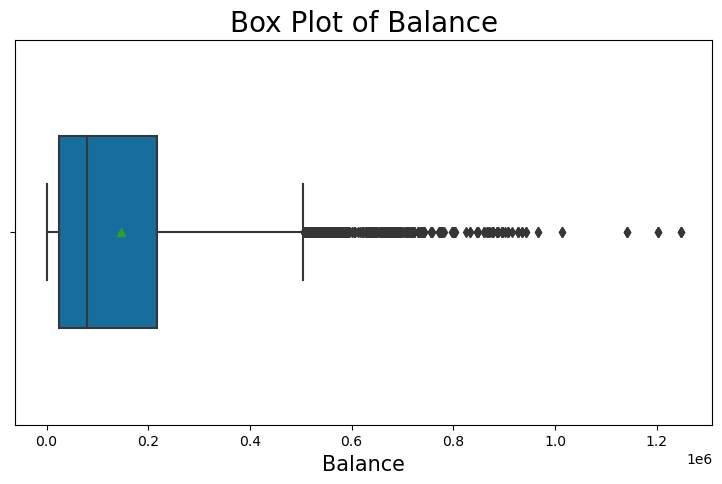

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(
    x="Balance",
    data=dev, showmeans=True,
    width=0.5, 
    palette="colorblind"
    )
plt.title("Box Plot of Balance", fontsize=20)
plt.xlabel("Balance", fontsize=15)

In [16]:
#Getting Upper Control Limit value for Balance
Q1, Q3 = dev["Balance"].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ",  round(UCL))

UCL =  506082


In [17]:
dev["Bal_cap"]=dev["Balance"].map(
    lambda x: 500000 if x > 500000 else x
)


## Missing Value Imputation

https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/
### In our dataset there is no missing value

## Visualization and Pattern Detection

In [18]:
# pip install sweetviz
import sweetviz as sv
report = sv.analyze([dev, 'Train'], target_feat='Target')

                                             |                                             | [  0%]   00:00 ->…

In [19]:
#display the report
report.show_html('Visualization.html')

Report Visualization.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Variable Transformation

In [20]:
import statsmodels.formula.api as sm
import statsmodels.api as sma

mylogit = sm.glm(
    formula = "Target ~ Age", data = dev,
    family = sma.families.Binomial()
).fit()

mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.4
Date:                Thu, 20 Jun 2024   Deviance:                       5908.8
Time:                        22:41:54   Pearson chi2:                 1.00e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0001995
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5531      0.148    -17.225      0.000      -2.844      -2.263
Age            0.0052      0.004      1.413      0.158      -0.002       0.012
==============================================================================
"""

In [21]:
## Transforming Age Variable
dev["DV_Age"]=dev["Age"].map(lambda
         x: 43-(x-43) if x>43 else x)

In [22]:

mylogit = sm.glm(
    formula = "Target ~ DV_Age", data = dev,
    family = sma.families.Binomial()
).fit()

mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2942.2
Date:                Thu, 20 Jun 2024   Deviance:                       5884.3
Time:                        22:41:54   Pearson chi2:                 1.00e+04
No. Iterations:                     5   Pseudo R-squ. (CS):           0.002648
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5005      0.231    -15.129      0.000      -3.954      -3.047
DV_Age         0.0334      0.007      5.089      0.000       0.021       0.046
==============================================================================
"""

## Multiple Logistic Regression

In [23]:
dev.columns

Index(['Cust_ID', 'Target', 'Age', 'Gender', 'Balance', 'Occupation',
       'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period', 'Bal_cap',
       'DV_Age'],
      dtype='object')

In [24]:
import statsmodels.formula.api as sm
import statsmodels.api as sma

f = "Target ~  Gender + Bal_cap + Occupation + No_OF_CR_TXNS +  SCR + Holding_Period + DV_Age"
mylogit = sm.glm(
    formula = f, 
    data = dev, family = sma.families.Binomial()
).fit()

mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9989
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.6
Date:                Thu, 20 Jun 2024   Deviance:                       5097.1
Time:                        22:41:54   Pearson chi2:                 1.00e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.07815
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.8723      0.290     -9.888      0.000      -3.442      -2.303
Gender[T.M]               -0.2590      0.092     -2.811      0.005      -0.440      -0.078
Gender[T.O]               -0.2779      0.361     -0.770      0.441      -0.986       0.430
Occupation[T.SAL]         -0.2590      0.107     -2.428      0.015      -0.468      -0.050
Occupation[T.SELF-EMP]     0.7955      0.104      7.632      0.000       0.591       1.000
Occupation[T.SENP]         0.1344      0.111      1.211      0.226      -0.083       0.352
Bal_cap                -2.076e-06   3.19e-07     -6.501      0.000    -2.7e-06   -1.45e-06
No_OF_CR_TXNS              0.0338      0.003     11.842      0.000       0.028       0.039
SCR                        0.0010      0.000      7.142      0.000       0.001       0.001
Holding_Period            -0.0908      0.005    -18.825      0.000      -0.100      -0.081
DV_Age                     0.0204      0.007      2.902      0.004       0.007       0.034
==========================================================================================
"""

In [25]:
## Variance Inflation Factor (VIF) for Multi-Collinearity Check
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(formula,data):
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Var_Name"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    return(vif.round(2))

vif_check =VIF(f ,
               data = dev)
vif_check 

,Var_Name,VIF
0,Intercept,56.58
1,Gender[T.M],1.18
2,Gender[T.O],1.05
3,Occupation[T.SAL],1.52
4,Occupation[T.SELF-EMP],1.35
5,Occupation[T.SENP],1.51
6,Bal_cap,1.09
7,No_OF_CR_TXNS,1.14
8,SCR,1.00
9,Holding_Period,1.00


#### Gender variable is insignificant. 
#### Re-run after dropping the Gender variable

In [26]:
dev.columns

Index(['Cust_ID', 'Target', 'Age', 'Gender', 'Balance', 'Occupation',
       'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period', 'Bal_cap',
       'DV_Age'],
      dtype='object')

In [27]:
f = "Target ~  Bal_cap + Occupation + No_OF_CR_TXNS +  SCR + Holding_Period + DV_Age"
mylogit = sm.glm(
    formula = f, 
    data = dev, family = sma.families.Binomial()
).fit()

mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9991
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.4
Date:                Thu, 20 Jun 2024   Deviance:                       5104.9
Time:                        22:41:54   Pearson chi2:                 1.01e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.07743
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.0183      0.287    -10.529      0.000      -3.580      -2.456
Occupation[T.SAL]         -0.2837      0.106     -2.675      0.007      -0.492      -0.076
Occupation[T.SELF-EMP]     0.7883      0.104      7.570      0.000       0.584       0.992
Occupation[T.SENP]         0.1692      0.110      1.536      0.125      -0.047       0.385
Bal_cap                -1.973e-06   3.17e-07     -6.216      0.000    -2.6e-06   -1.35e-06
No_OF_CR_TXNS              0.0321      0.003     11.600      0.000       0.027       0.037
SCR                        0.0010      0.000      7.155      0.000       0.001       0.001
Holding_Period            -0.0902      0.005    -18.768      0.000      -0.100      -0.081
DV_Age                     0.0195      0.007      2.776      0.006       0.006       0.033
==========================================================================================
"""

## Predict Probabilities

In [28]:
## Predicting Probabilities
dev["prob"] = mylogit.predict(dev)

In [29]:
max(dev["prob"])

0.6567685341179567

In [30]:
min(dev["prob"])

0.002962665050176091

In [31]:
460/10000

0.046

In [32]:
dev.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period,Bal_cap,DV_Age,prob
15453,C15310,0,26,M,245500.00,SAL,5,26-30,230,10,245500.00,26,0.022284
19694,C13835,0,35,F,176040.94,SENP,2,31-35,465,26,176040.94,35,0.013243
16097,C8103,0,25,M,147725.39,SELF-EMP,8,<25,365,29,147725.39,25,0.017750
18828,C17384,0,31,M,878550.06,PROF,11,31-35,970,8,500000.00,31,0.059480
3011,C10748,0,38,M,9158.51,PROF,50,36-40,204,14,9158.51,38,0.149089


## Model Performance Measure

### Rank Order Table, K-S Statistic, Gains Table & Lift Chart

In [33]:
dev['decile']=pd.qcut(dev.prob, 10, labels=False)

def Rank_Order(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt_cust","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt_cust"],2)
    Rank["cum_cust"]=np.cumsum(Rank["cnt_cust"])
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_cust_pct"]=round(Rank["cum_cust"]*100/np.sum(Rank["cnt_cust"]),2)
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank["Lift"] = round(Rank["cum_resp_pct"] / Rank["cum_cust_pct"],2)
    Rank
    return(Rank)


Gains_Table = Rank_Order(dev,"prob","Target")
Gains_Table



,decile,min_prob,max_prob,avg_prob,cnt_cust,cnt_resp,cnt_non_resp,rrate,cum_cust,cum_resp,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_non_resp_pct,KS,Lift
9,9,0.200049,0.656769,0.295953,1000.0,297.0,703.0,29.7,1000.0,297.0,703.0,10.0,34.14,7.70,26.44,3.41
8,8,0.136886,0.200047,0.166176,1000.0,162.0,838.0,16.2,2000.0,459.0,1541.0,20.0,52.76,16.88,35.88,2.64
7,7,0.099149,0.136865,0.116680,1000.0,107.0,893.0,10.7,3000.0,566.0,2434.0,30.0,65.06,26.66,38.40,2.17
6,6,0.074532,0.099087,0.085745,1000.0,90.0,910.0,9.0,4000.0,656.0,3344.0,40.0,75.40,36.63,38.77,1.89
5,5,0.055776,0.074504,0.064560,1000.0,64.0,936.0,6.4,5000.0,720.0,4280.0,50.0,82.76,46.88,35.88,1.66
4,4,0.042511,0.055768,0.049066,1000.0,49.0,951.0,4.9,6000.0,769.0,5231.0,60.0,88.39,57.29,31.10,1.47
3,3,0.031076,0.042510,0.036702,1000.0,43.0,957.0,4.3,7000.0,812.0,6188.0,70.0,93.33,67.78,25.55,1.33
2,2,0.022287,0.031071,0.026696,1000.0,28.0,972.0,2.8,8000.0,840.0,7160.0,80.0,96.55,78.42,18.13,1.21
1,1,0.014357,0.022286,0.018296,1000.0,22.0,978.0,2.2,9000.0,862.0,8138.0,90.0,99.08,89.13,9.95,1.10
0,0,0.002963,0.014340,0.010124,1000.0,8.0,992.0,0.8,10000.0,870.0,9130.0,100.0,100.00,100.00,0.00,1.00


### AUC-ROC Curve

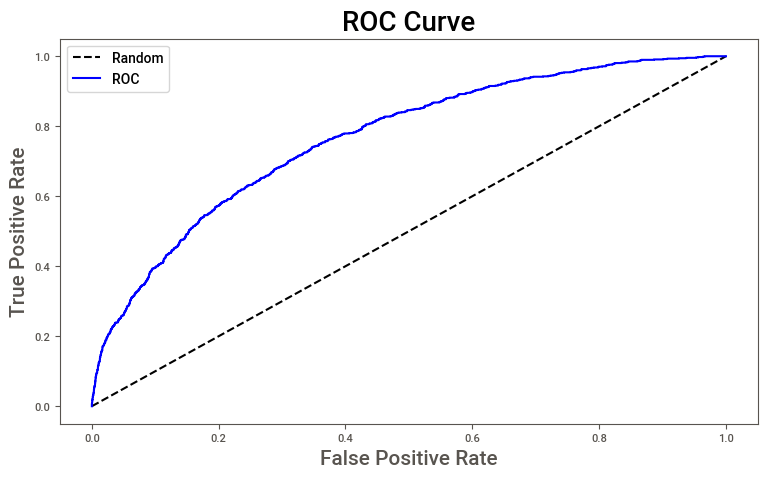

In [34]:
# Plot AUC-ROC curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(dev["Target"],dev["prob"] )

plt.figure(figsize=(9,5))
plt.plot([0, 1], [0, 1], "k--", label='Random')
plt.plot(fpr, tpr, color='blue', label='ROC')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve', fontsize=20)
plt.legend(fontsize=10, loc='best')
plt.show()

In [35]:
from sklearn.metrics import  auc
roc_auc = round(auc(fpr, tpr), 3)

KS = round((tpr - fpr).max(), 5)


print("AUC of the model is:", roc_auc)
print("KS of the model is:", KS)

AUC of the model is: 0.765
KS of the model is: 0.39297


### Gini Coefficient

In [36]:
gini_coeff = 2 * roc_auc - 1
print("Gini Coefficient of the model is:", round(gini_coeff,3))

Gini Coefficient of the model is: 0.53


### Confusion Matrix and Classification Accuracy

In [37]:
dev.Target.value_counts(normalize = True)

Target
0    0.913
1    0.087
Name: proportion, dtype: float64

In [38]:
## Classification
dev.prob.quantile(
  [0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.913,0.95,0.954, 0.99,0.999, 0.9999,1])

0.0000    0.002963
0.0100    0.006105
0.0500    0.010623
0.1000    0.014355
0.2500    0.026773
0.5000    0.055772
0.7500    0.116113
0.9000    0.200047
0.9130    0.212752
0.9500    0.269623
0.9540    0.278730
0.9900    0.423914
0.9990    0.550135
0.9999    0.656582
1.0000    0.656769
Name: prob, dtype: float64

In [39]:
dev.prob.quantile(0.913)

0.21275183739535183

In [40]:
dev["class"] = dev["prob"].map(
        lambda x: 1 if x > dev.prob.quantile(0.91) else 0)

In [41]:
dev["prob"].sum()

870.0000000055591

In [42]:
dev["class"].value_counts()

class
0    9100
1     900
Name: count, dtype: int64

In [43]:
#Confusion Matrix and Classification Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score   
confusion_matrix = (
    {"conf_matx": confusion_matrix(dev.Target,dev["class"]),
     "accuracy": accuracy_score(dev.Target,dev["class"])
    })

print("confusion matrix \n" , confusion_matrix["conf_matx"], 
      "\n\nclassification accuracy ", confusion_matrix["accuracy"]
      )


confusion matrix 
 [[8510  620]
 [ 590  280]] 

classification accuracy  0.879


## Model Validation

In [44]:
mylogit_val = sm.glm(
    formula = f, 
    data = val, family = sma.families.Binomial()
).fit()

mylogit_val.summary()

PatsyError: Error evaluating factor: NameError: name 'DV_Age' is not defined
    Target ~  Bal_cap + Occupation + No_OF_CR_TXNS +  SCR + Holding_Period + DV_Age
                                                                             ^^^^^^

In [45]:
## Transforming Age Variable
val["DV_Age"]=val["Age"].map(lambda
         x: 43-(x-43) if x>43 else x)

val["Bal_cap"]=val["Balance"].map(
    lambda x: 500000 if x > 500000 else x
)

val["Bal_cap2"]=val["Bal_cap"] / 1000

In [46]:
mylogit_val = sm.glm(
    formula = f, 
    data = val, family = sma.families.Binomial()
).fit()

mylogit_val.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6000
Model:                            GLM   Df Residuals:                     5991
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1529.9
Date:                Thu, 20 Jun 2024   Deviance:                       3059.8
Time:                        22:42:10   Pearson chi2:                 6.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.06989
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.1704      0.371     -8.540      0.000      -3.898      -2.443
Occupation[T.SAL]         -0.2377      0.137     -1.734      0.083      -0.506       0.031
Occupation[T.SELF-EMP]     0.6567      0.136      4.819      0.000       0.390       0.924
Occupation[T.SENP]         0.2297      0.140      1.639      0.101      -0.045       0.504
Bal_cap                -1.026e-06   3.78e-07     -2.711      0.007   -1.77e-06   -2.84e-07
No_OF_CR_TXNS              0.0285      0.004      7.923      0.000       0.021       0.036
SCR                        0.0009      0.000      4.542      0.000       0.000       0.001
Holding_Period            -0.0927      0.006    -14.760      0.000      -0.105      -0.080
DV_Age                     0.0261      0.009      2.870      0.004       0.008       0.044
==========================================================================================
"""

In [47]:
## Development Model Summary
mylogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9991
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.4
Date:                Thu, 20 Jun 2024   Deviance:                       5104.9
Time:                        22:42:10   Pearson chi2:                 1.01e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.07743
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.0183      0.287    -10.529      0.000      -3.580      -2.456
Occupation[T.SAL]         -0.2837      0.106     -2.675      0.007      -0.492      -0.076
Occupation[T.SELF-EMP]     0.7883      0.104      7.570      0.000       0.584       0.992
Occupation[T.SENP]         0.1692      0.110      1.536      0.125      -0.047       0.385
Bal_cap                -1.973e-06   3.17e-07     -6.216      0.000    -2.6e-06   -1.35e-06
No_OF_CR_TXNS              0.0321      0.003     11.600      0.000       0.027       0.037
SCR                        0.0010      0.000      7.155      0.000       0.001       0.001
Holding_Period            -0.0902      0.005    -18.768      0.000      -0.100      -0.081
DV_Age                     0.0195      0.007      2.776      0.006       0.006       0.033
==========================================================================================
"""

In [48]:
dev_val_ratio = pd.DataFrame(mylogit.params)
dev_val_ratio.columns = ['Dev_Coeff']
dev_val_ratio

,Dev_Coeff
Intercept,-3.018308
Occupation[T.SAL],-0.283744
Occupation[T.SELF-EMP],0.788349
Occupation[T.SENP],0.169183
Bal_cap,-0.000002
No_OF_CR_TXNS,0.032064
SCR,0.001039
Holding_Period,-0.090208
DV_Age,0.019539


In [49]:
mylogit_val.params

Intercept                -3.170438
Occupation[T.SAL]        -0.237686
Occupation[T.SELF-EMP]    0.656676
Occupation[T.SENP]        0.229672
Bal_cap                  -0.000001
No_OF_CR_TXNS             0.028512
SCR                       0.000868
Holding_Period           -0.092684
DV_Age                    0.026099
dtype: float64

In [50]:
dev_val_ratio['Val_Coeff'] = pd.DataFrame(mylogit_val.params)
dev_val_ratio['dev_val_ratio'] = dev_val_ratio['Dev_Coeff'] / dev_val_ratio['Val_Coeff']
dev_val_ratio

,Dev_Coeff,Val_Coeff,dev_val_ratio
Intercept,-3.018308,-3.170438,0.952016
Occupation[T.SAL],-0.283744,-0.237686,1.193778
Occupation[T.SELF-EMP],0.788349,0.656676,1.200515
Occupation[T.SENP],0.169183,0.229672,0.736631
Bal_cap,-0.000002,-0.000001,1.924126
No_OF_CR_TXNS,0.032064,0.028512,1.124568
SCR,0.001039,0.000868,1.196971
Holding_Period,-0.090208,-0.092684,0.973280
DV_Age,0.019539,0.026099,0.748646


# Next Steps:

1. Based on the Dev - Val ratio, you have to do the necessary trend fitting for variables, for e.g. Balance Variable
2. Rebuild the model of Development Data
3. Validate the model on Validation Data
4. Finally, you have to check the Model Performance on Hold Out Data

### Thank you